In [3]:
from filterpy.kalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# define transition matrix
# linear
Fn = 2; # hidden model dimension
Hn = 1; # measurement dimension

kf = KalmanFilter(Fn, Hn);

In [5]:
# initial hidden state
kf.x = np.array([[ 0.03247099],[ 0.09944176]]);
# initial transition matrix
kf.F = np.array([[1., 1.], 
                [0., 1.]]);
# initial measurements function
kf.H = np.array([[1., 0.]]);

In [14]:
# expectation minimization for Kalman Filter
from pykalman import KalmanFilter as KF
# generate clean dataset
x = 0;
xMC = [0]; rMC = [0];
while x < 1 * np.pi:
    x = x + 0.01
    
    m = (2 + 0.3 * np.sin(x/10)) * np.power(np.sin(x), 10) + np.random.normal(0, 0.01);   
       
    xMC.append(x)
    rMC.append(m)

lkf = KF(transition_matrices = kf.F, observation_matrices = kf.H)
lkf.em(rMC, n_iter = 5)

EM_initialstate = lkf.initial_state_mean
EM_P = lkf.transition_covariance
EM_R = lkf.observation_covariance
EM_Q = lkf.initial_state_covariance


In [15]:
kf.H

array([[ 1.,  0.]])

In [16]:
EM_Q

array([[ 0.04077798, -0.02105388],
       [-0.02105388,  0.0870259 ]])

In [26]:
# covariance matrix
kf.P = EM_P * 1 # kf.P *= 3;
# state uncertainty
kf.R = EM_R * 100 # kf.R = 1;
kf.Q = EM_Q * 0.03# kf.Q = np.array([[0.0001, 0.0005], [0.0005, 0.0005]])

# intial state
kf.x = EM_initialstate


FP - detected but not present
0.6800000000000004
FN - not detected
0.9700000000000006
FN - not detected
2.8399999999999834
FN - not detected
4.049999999999958
FN - not detected
4.3099999999999525
TP - present and detected
4.699999999999944
TP - present and detected
FP - detected but not present
7.269999999999889
FN - not detected
7.589999999999883
FN - not detected
7.879999999999876
FN - not detected
8.919999999999854
TP - present and detected


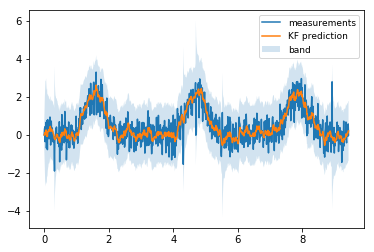

In [27]:
x = 0;
rM = [0]; xM = [0];
yM = []; yE = [];

while x < 3 * np.pi:
    x = x + 0.01
    kf.predict();
    y = kf.x[0] + kf.x[1] * 0.01;
    e = kf.P[0, 0] #+ kf.P[1, 1] * 0.01
    e = e
    
    m = (2 + 0.3 * np.sin(x/10)) * np.power(np.sin(x), 10) + np.random.normal(0, 0.5);   
    m *= 1
    
    realError = False
    if (np.random.uniform() < 0.01):
        o = np.random.normal(0, 1);
        if (abs(o) > 0.3):
            m = m + o
            print(x)
            realError = True
    
    error = False
    if (m < y - e):
        kf.P *= 2;
        error = True
    if (m > y + e):
        kf.P *= 2;
        error = True
    
    if error == True and realError == True:
        print("TP - present and detected")
    if error == True and realError == False:
        print("FP - detected but not present")
    if error == False and realError == True:
        print("FN - not detected")
    
    xM.append(x)

    if error == False:
        kf.update(m)
    
    rM.append(m)
    yM.append(y)
    yE.append(e)    

yM.append(yM[-1]);
yE.append(yE[-1]);
xM = np.array(xM)
rM = np.array(rM)
yM = np.array(yM)
yE = np.array(yE)
    
plt.plot(xM, rM, label="measurements"); plt.plot(xM, yM, label="KF prediction");
plt.fill_between(xM, yM - yE, yM + yE, label="band", alpha = 0.2)
plt.legend(loc='upper right', prop={'size': 9})

plt.savefig('kf-noise05.pdf')
plt.show()

In [12]:
plt.savefig('foo.png')

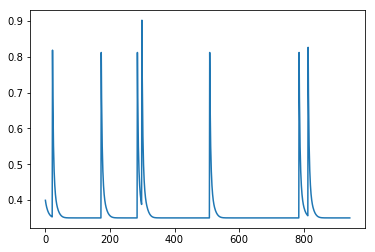

In [22]:
plt.plot(yE); plt.show()

In [83]:
kf.P

array([[ 0.06040239,  0.03330333],
       [ 0.03330333,  0.17887635]])

## Generation of test data

Noise: 0.1
0.2700000000000001 0.6815265887205606
1.1600000000000008 -2.944726761196156
2.679999999999987 0.5554120976779059
2.8399999999999834 -1.3629228925399888
2.8799999999999826 -0.9420187229130131
2.9799999999999804 0.4345672573888161
7.159999999999892 1.2819739986442968
11.379999999999802 -2.4247940632694105
13.099999999999765 -0.4474267253888308
13.479999999999757 -1.3539717373409343
13.80999999999975 3.352811143020373
14.679999999999731 -0.9856256931556145
15.299999999999718 4.267745163943131
16.18999999999973 -1.1378218006079792
16.279999999999745 -1.1277018712085423
16.81999999999983 3.084711808328639
17.39999999999992 0.4044337605292508
17.71999999999997 -0.4830722330833608
18.93000000000016 -2.46726543567023
18.94000000000016 2.3595677328391735
19.030000000000175 -0.3172538929665682
20.99000000000048 -0.8458485836741347
21.250000000000522 -2.9972116540987765
23.120000000000815 0.7225763190549472
25.180000000001137 1.6895236082825744
25.77000000000123 1.2727425551577516
25.8

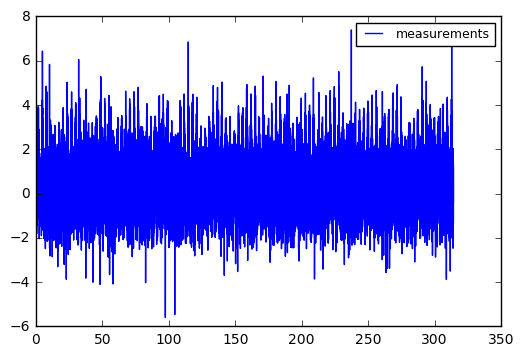

In [88]:
# generation of the test set
# noise 0.1 - 1
for noise10 in range(1, 10):
    noise = noise10 / 10;
    print("Noise:", noise)
    x = 0;
    rM = [0]; xM = [0];
    
    f = open("./data/data" + str(noise10) + ".csv", "wb");
    f.write(b"offset;val;error;errorRate\n");
    
    while x < 100 * np.pi:
        x = x + 0.01

        m = (2 + 0.8 * np.sin(x/3.5)) * np.power(np.sin(x), 10) + np.random.normal(0, noise);   

        xM.append(x)
        
        realError = False
        o = 0
        
        if (np.random.uniform() < 0.01):
            o = np.random.normal(0, 2);
            if (abs(o) > 2 * noise):
                m = m + o
                print(x, o)
                realError = True   
                
        rM.append(m)
        
        line = str(x) + ";" + str(m) + ";" + str(realError) + ";" + str(o) + "\r\n"
        lineb = bytearray();
        lineb.extend(map(ord, line))
        f.write(lineb)
        
    f.close();

xM = np.array(xM)
rM = np.array(rM)
    
plt.plot(xM, rM, label="measurements");
plt.legend(loc='upper right', prop={'size': 9})

plt.show()

    